In [18]:
# do global stuff
from bs4 import BeautifulSoup, UnicodeDammit
import dirdict
from tqdm import tqdm
from pprint import pprint
import re
import os
from collections import Counter
from random import sample

cwd = dirdict.DirDict()
tailwind_html = cwd / "tailwind_html"

num_files = len(list(tailwind_html.keys()))
print(f"Found {num_files} HTML documents")



Found 61622 HTML documents


In [75]:
lang_counter = Counter() #declared language 

# limit to a certain number of css pages
# just to make it run faster yay
dataset_limit = None
dataset_files = sample(list(tailwind_html.keys()), dataset_limit) if dataset_limit else tailwind_html.keys()

for url in tqdm(list(dataset_files)):
    doc = tailwind_html[url]
    soup = BeautifulSoup(
        UnicodeDammit(  # resolves decoding warnings
            doc,
            ["latin-1", "iso-8859-1", "windows-1251"]
        ).unicode_markup,
        "html.parser"
    )
    html = soup.html
    if html:
        lang = soup.html.get("lang")
    if html and lang:
        lang_counter[lang.lower()] += 1
    else:
        lang_counter["none"] += 1



  2%|▏         | 951/61622 [01:30<1:35:49, 10.55it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'tailwind_html\\https__SLASH__SLASH_aecm.org.mo_SLASH_%E8%8A%B1%E7%B5%AE%E7%AC%AC%E5%8D%81%E4%B8%80%E5%B1%86%E6%BE%B3%E9%96%80%E5%AD%B8%E7%94%9F%E4%B8%AD%E6%96%87%E7%A1%AC%E7%AD%86%E6%9B%B8%E6%B3%95%E6%AF%94%E8%B3%BD%E9%A0%92%E7%8D%8E%E5%85%B8%E7%A6%AE_SLASH_'

In [69]:
def sum_string_occurence(s):
    return sum(lang_counter[h] for h in lang_counter if s in h)

en_langs = ['en', 'en-au', 'en-bz', 'en-ca', 'en-ie', 'en-jm', 'en-nz', 'en-za', 'en-tt', 'en-gb', 'en-us']
def sum_en_occurneces():
  return sum(lang_counter[h] for h in lang_counter if h in en_langs)

num_english_pages = sum_en_occurneces()
num_not_specified_lang = sum_string_occurence('none')
num_not_english_pages = (dataset_limit - num_english_pages - num_not_specified_lang) if dataset_limit else (num_files - num_english_pages - num_not_specified_lang)

print(f"{num_not_specified_lang} pages does not have the lang attribute specified")
print(f"{num_english_pages} pages are in English")
print(f"{num_not_english_pages} pages are not in English")

print("Top 10 most common languages:")
pprint(lang_counter.most_common(10))
print("")


2646 pages does not have the lang attribute specified
4975 pages are in English
2379 pages are not in English
Top 10 most common languages:
[('en', 2744),
 ('none', 2646),
 ('en-us', 1259),
 ('en-gb', 907),
 ('ru', 394),
 ('ja', 241),
 ('es', 201),
 ('it-it', 183),
 ('zh-hant', 178),
 ('fr', 136)]



C:\Users\Christiano\AppData\Local\Temp\ipykernel_8560\3423043827.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


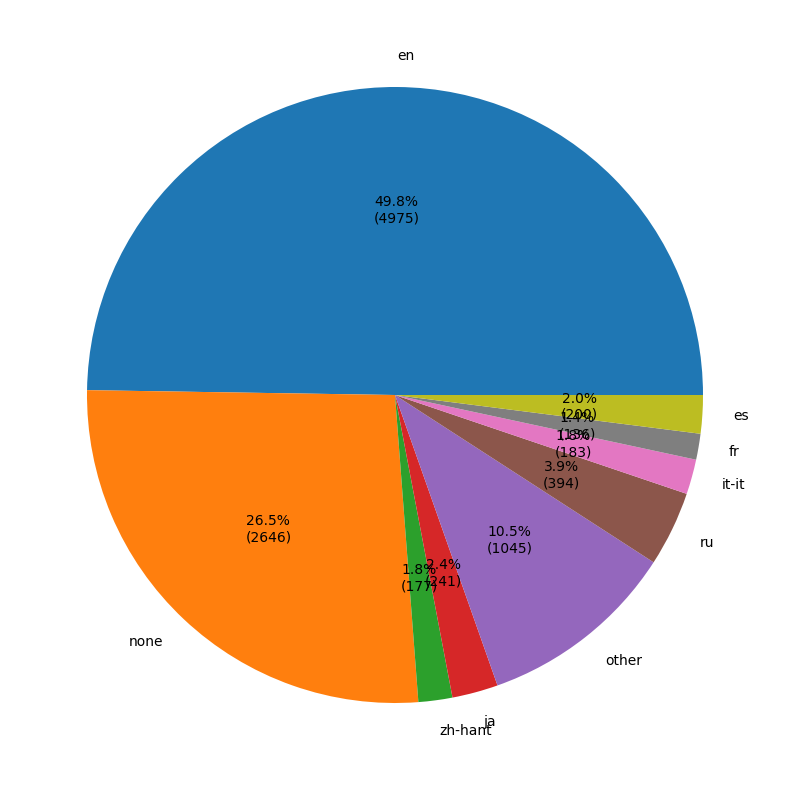

In [73]:

import matplotlib.pyplot as plt
import numpy as np

lang_counter_modified = Counter()
total_count = sum(lang_counter[h] for h in lang_counter)
lang_counter_modified['en'] = sum_en_occurneces()
for l in lang_counter:
    if l not in en_langs:
        if lang_counter[l] > total_count * 0.01:
            lang_counter_modified[l] = lang_counter[l]
        else:
            lang_counter_modified["other"] += lang_counter[l]
    
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

languages, counts = zip(*(lang_counter_modified.items()))

fig = plt.figure(figsize=(16,10))
plt.pie(counts, labels = languages, autopct=lambda pct: func(pct, counts))

fig.show()